Aplicar PCA en toda la data

In [ ]:
import numpy as np

output_dir = "features8"
descriptors = np.load(f"{output_dir}/descriptores.npy")


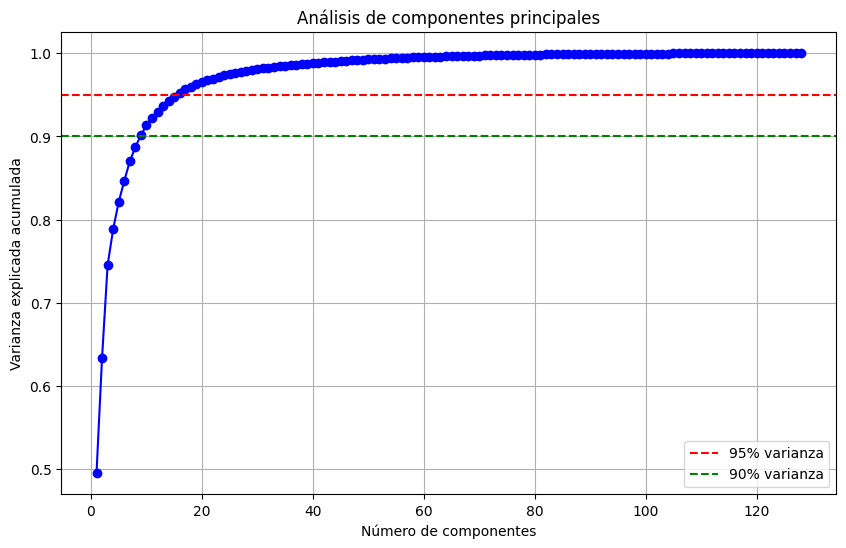

Componentes necesarios para 90.0% de varianza: 9
Componentes necesarios para 95.0% de varianza: 16
Componentes necesarios para 99.0% de varianza: 44


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Estandarizar los datos
scaler = StandardScaler()
descriptors_scaled = scaler.fit_transform(descriptors)

# 2. Calcular PCA con todos los componentes
pca = PCA()
pca.fit(descriptors_scaled)

# 3. Calcular varianza explicada acumulada
var_ratio = pca.explained_variance_ratio_
var_cumsum = np.cumsum(var_ratio)

# 4. Visualizar
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(var_cumsum) + 1), var_cumsum, 'bo-')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% varianza')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% varianza')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Análisis de componentes principales')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir número de componentes para diferentes umbrales
for threshold in [0.90, 0.95, 0.99]:
    n_components = np.argmax(var_cumsum >= threshold) + 1
    print(f"Componentes necesarios para {threshold*100}% de varianza: {n_components}")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Estandarizar datos
scaler = StandardScaler()
descriptors_scaled = scaler.fit_transform(descriptors)

# Aplicar PCA con 16 componentes
pca = PCA(n_components=44)
descriptors_reduced = pca.fit_transform(descriptors_scaled)

# Guardar los vectores reducidos
np.save(f"{output_dir}/descriptores_pca44.npy", descriptors_reduced)

# Opcional: guardar el objeto PCA y scaler para futura transformación de nuevos datos
from joblib import dump
dump(pca, f"{output_dir}/pca_model.joblib")
dump(scaler, f"{output_dir}/scaler_model.joblib")

print(f"Forma original: {descriptors.shape}")
print(f"Forma reducida: {descriptors_reduced.shape}")

Forma original: (15019, 128)
Forma reducida: (15019, 44)
